In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns
import matplotlib

In [2]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)
true8_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)
true12_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

gru4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
gru4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
gru4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
gru4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["test"]

gru8_nona_hand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
gru8_nona_rand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/rand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
gru8_diff_hand = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
gru8_diff_rand = np.load("/media/hdd01/sklee/CA1_clust8-30/rand/gru_s14_h20_output.npz")["test"]

gru12_nona_hand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
gru12_nona_rand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/rand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
gru12_diff_hand = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
gru12_diff_rand = np.load("/media/hdd01/sklee/CA1_clust12-20/rand/gru_s18_h20_output.npz")["test"]

gru4_diff_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_hand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["E_scale"]
gru4_nona_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["E_scale"]

gru4_diff_rand_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["E_scale"]
eloc4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[:,1]

bg_idx = np.arange(2000)
bg_idx = np.delete(bg_idx, np.arange(880,1120))

In [3]:
diff_var_exp = np.zeros((6,20))
nona_var_exp = np.zeros((6,20))

for i in range(20):
    diff_var_exp[0,i] = explained_variance_score(true4_diff[i], gru4_diff_hand[i])
    diff_var_exp[1,i] = explained_variance_score(true4_diff[i], gru4_diff_rand[i])
    diff_var_exp[2,i] = explained_variance_score(true8_diff[i], gru8_diff_hand[i])
    diff_var_exp[3,i] = explained_variance_score(true8_diff[i], gru8_diff_rand[i])
    diff_var_exp[4,i] = explained_variance_score(true12_diff[i], gru12_diff_hand[i])
    diff_var_exp[5,i] = explained_variance_score(true12_diff[i], gru12_diff_rand[i])
    
    nona_var_exp[0,i] = explained_variance_score(true4_nona[i], gru4_nona_hand[i])
    nona_var_exp[1,i] = explained_variance_score(true4_nona[i], gru4_nona_rand[i])
    nona_var_exp[2,i] = explained_variance_score(true8_nona[i], gru8_nona_hand[i])
    nona_var_exp[3,i] = explained_variance_score(true8_nona[i], gru8_nona_rand[i])
    nona_var_exp[4,i] = explained_variance_score(true12_nona[i], gru12_nona_hand[i])
    nona_var_exp[5,i] = explained_variance_score(true12_nona[i], gru12_nona_rand[i])
    
    

/tmp/ipykernel_14126/141232846.py:199: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


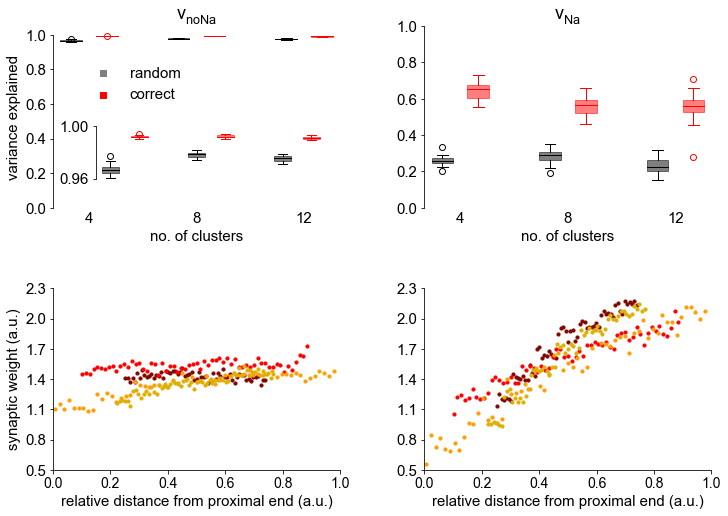

In [5]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

tick_size = 15
label_size = 15
title_size = 18
inset_size = 15

plt.rcParams['font.size'] = '14'


fig = plt.figure(constrained_layout=True, figsize = (10,7))
gs = fig.add_gridspec(2,2, wspace=0.13, hspace=0.16)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

colors = ["red", "gray", "red", "gray", "red", "gray"]

###
bp = ax1.boxplot(nona_var_exp.T, positions = [2,1,5,4,8,7], widths = 0.6, patch_artist=True)
counter = 0

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_alpha(0.5)
    #if counter%2 == 1:
        #patch.set_hatch("xxxxx")
    counter += 1
for patch in bp["medians"]:
    patch.set_color("black")
    
#########
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(diff_var_exp.shape[0]):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    
for i in range(diff_var_exp.shape[0]*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    else:
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
###########
    
###
bp = ax2.boxplot(diff_var_exp.T, positions = [2,1,5,4,8,7], widths = 0.6, patch_artist=True)
  

#########
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(diff_var_exp.shape[0]):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    
for i in range(diff_var_exp.shape[0]*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    else:
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
###########

hR = ax1.scatter(1,1,c='red', marker="s")
hG = ax1.scatter(1,1,c='gray', marker="s")
ax1.legend((hG, hR),('random', 'correct'), frameon=False, loc=(0.1,0.55), fontsize=label_size)
hG.set_visible(False)
hR.set_visible(False)
    
ax1.set_ylim(0,1.05)
ax1.spines.left.set_bounds(0,1)
ax2.set_ylim(0,1)

#ax1.set_yticks(np.arange(0.1,1.01,0.3))
#ax2.set_yticks(np.arange(0.1,1.01,0.3))
ax1.set_xticks([1.5, 4.5, 7.5])
ax2.set_xticks([1.5, 4.5, 7.5])
ax1.set_xticklabels(["4","8","12"], fontsize=tick_size)
ax2.set_xticklabels(["4","8","12"], fontsize=tick_size)

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)

ax1.tick_params(axis="x", length=0)
ax2.tick_params(axis="x", length=0)

ax1.set_ylabel("variance explained", fontsize=label_size)
ax1.set_xlabel("no. of clusters", fontsize=label_size)
ax2.set_xlabel("no. of clusters", fontsize=label_size)
ax1.set_title("$\mathregular{v_{noNa}}$", fontsize=title_size)
ax2.set_title("$\mathregular{v_{Na}}$", fontsize=title_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)
ax2.yaxis.set_tick_params(labelsize=tick_size)

ins = ax1.inset_axes([0.15,0.15,0.8,0.3])
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
bp = ins.boxplot(nona_var_exp.T, positions = [2,1,5,4,8,7], widths = 0.6, patch_artist=True)

#########
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(diff_var_exp.shape[0]):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    
for i in range(diff_var_exp.shape[0]*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    else:
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
###########

ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks([0.96,1])
ins.spines.left.set_bounds((0.96, 1))
ins.yaxis.set_tick_params(labelsize=inset_size)
ins.yaxis.set_tick_params(labelsize=inset_size)

#colors = ["tab:purple", "tab:pink", "tab:olive", "tab:cyan"]
colors = ["#810701","#FF0000","#FF9E00","#DEB003"]
ax3.scatter(eloc4[880:940], gru4_nona_hand_scale[880:940], color=colors[0], s=10, label="Subunit 1")
ax3.scatter(eloc4[940:1000], gru4_nona_hand_scale[940:1000], color=colors[1], s=10, label="Subunit 2")
ax3.scatter(eloc4[1000:1060], gru4_nona_hand_scale[1000:1060], color=colors[2], s=10, label="Subunit 3")
ax3.scatter(eloc4[1060:1120], gru4_nona_hand_scale[1060:1120], color=colors[3], s=10, label="Subunit 4")

ax4.scatter(eloc4[880:940], gru4_diff_hand_scale[880:940], color=colors[0], s=10, label="Subunit 1")
ax4.scatter(eloc4[940:1000], gru4_diff_hand_scale[940:1000], color=colors[1], s=10, label="Subunit 2")
ax4.scatter(eloc4[1000:1060], gru4_diff_hand_scale[1000:1060], color=colors[2], s=10, label="Subunit 3")
ax4.scatter(eloc4[1060:1120], gru4_diff_hand_scale[1060:1120], color=colors[3], s=10, label="Subunit 4")

ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)

ax3.set_ylim(0.5,2.3)
ax4.set_ylim(0.5,2.3)
ax3.set_yticks(np.arange(0.5, 2.4,0.3))
ax4.set_yticks(np.arange(0.5, 2.4,0.3))
ax3.yaxis.set_tick_params(labelsize=tick_size)
ax4.yaxis.set_tick_params(labelsize=tick_size)
ax3.set_xlim(0,1)
ax4.set_xlim(0,1)

ax3.set_xlabel("relative distance from proximal end (a.u.)", fontsize=label_size)
ax3.set_ylabel("synaptic weight (a.u.)", fontsize=label_size)
ax4.set_xlabel("relative distance from proximal end (a.u.)", fontsize=label_size)
#ax3.legend(frameon=False, fontsize=label_size, loc=(0.1,0.7))

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_connectivity/fig_connectivity_raw.pdf", bbox_inches="tight", transparent=True)